In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.6 MB/s eta 0:00:00


## DATASET ROSAS

https://universe.roboflow.com/rose-leaf-diseases/rose-leaf-diseases

In [2]:
import os
import glob
import yaml

# 1. INSTALACIÓN Y DESCARGA (Tu código de Roboflow)
print("🤖 VcBot: Iniciando descarga desde Roboflow SDK...")

# Instalamos la librería (silenciosa para no llenar la pantalla)
# Tu código exacto
"""
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TrIRmN8b2RivP7N5Z1su")
project = rf.workspace("rose-leaf-diseases").project("rose-leaf-diseases")
version = project.version(11)
dataset = version.download("yolov8")
"""
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="optsSQIAxiNXEdI8izmp")
project = rf.workspace("rose-leaf-diseases").project("rose-leaf-diseases")
version = project.version(14)
dataset = version.download("yolov11")






# Capturamos la ruta donde Roboflow guardó los archivos
dataset_dir = dataset.location
print(f"\n✅ Descarga completada en: {dataset_dir}")

# ==========================================
# 2. REPORTE DE ESTRUCTURA Y CONTEO
# ==========================================
print(f"\n📊 REPORTE DEL DATASET (Carpeta: {dataset_dir})")
print("-" * 50)

carpetas = ['train', 'valid', 'test']
total_imgs = 0

for carpeta in carpetas:
    # Roboflow a veces usa 'valid', a veces 'val'. YOLO prefiere 'val' o 'valid'.
    # Buscamos la carpeta dentro de la ruta de descarga
    ruta_split = os.path.join(dataset_dir, carpeta)

    # Comprobamos si existe 'images' dentro
    ruta_imgs = os.path.join(ruta_split, 'images')
    if not os.path.exists(ruta_imgs):
        # A veces las imágenes están en la raíz del split
        ruta_imgs = ruta_split

    if os.path.exists(ruta_imgs) and os.path.isdir(ruta_imgs):
        imgs = glob.glob(os.path.join(ruta_imgs, '*.jpg')) + \
               glob.glob(os.path.join(ruta_imgs, '*.jpeg')) + \
               glob.glob(os.path.join(ruta_imgs, '*.png'))

        n = len(imgs)
        total_imgs += n
        print(f"📁 {carpeta.upper()}:")
        print(f"   └── {n} imágenes encontradas.")
    else:
        if carpeta != 'test': # Test es opcional
            print(f"⚠️ {carpeta.upper()}: No encontrada en {ruta_split}")

print("-" * 50)
print(f"∑ TOTAL: {total_imgs} imágenes.")

# ==========================================
# 3. ARREGLAR DATA.YAML (CRÍTICO PARA COLAB)
# ==========================================
print("\n🔧 CONFIGURACIÓN DE RUTAS (data.yaml)")

# Buscamos el yaml dentro de la carpeta descargada
yaml_path = os.path.join(dataset_dir, "data.yaml")

if os.path.exists(yaml_path):
    try:
        with open(yaml_path, 'r') as f:
            data = yaml.safe_load(f)

        # 1. Ajustamos la ruta base absoluta
        data['path'] = os.path.abspath(dataset_dir)

        # 2. Ajustamos las relativas (Roboflow suele poner rutas absolutas que rompen Colab)
        data['train'] = "train/images"
        data['val'] = "valid/images" # Roboflow suele llamar a la validación 'valid'
        data['test'] = "test/images" # Si existe

        # 3. Guardamos
        with open(yaml_path, 'w') as f:
            yaml.dump(data, f, default_flow_style=False)

        print(f"   ✅ Archivo corregido: {yaml_path}")
        print("   (Rutas actualizadas para entrenamiento en Colab)")

        # Mostramos las clases detectadas
        if 'names' in data:
            print(f"   📋 Clases: {data['names']}")

    except Exception as e:
        print(f"   ❌ Error editando yaml: {e}")
else:
    print("   ❌ No se encontró 'data.yaml' dentro de la carpeta del dataset.")

print(f"\n🚀 LISTO. Para entrenar usa: data='{dataset_dir}/data.yaml'")

🤖 VcBot: Iniciando descarga desde Roboflow SDK...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 137.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rose-leaf-diseases-14 in yolov11:: 100%|██████████| 12086/12086 [00:02<00:00, 5921.54it/s]



✅ Descarga completada en: /content/rose-leaf-diseases-14

📊 REPORTE DEL DATASET (Carpeta: /content/rose-leaf-diseases-14)
--------------------------------------------------
📁 TRAIN:
   └── 4968 imágenes encontradas.
📁 VALID:
   └── 546 imágenes encontradas.
📁 TEST:
   └── 523 imágenes encontradas.
--------------------------------------------------
∑ TOTAL: 6037 imágenes.

🔧 CONFIGURACIÓN DE RUTAS (data.yaml)
   ✅ Archivo corregido: /content/rose-leaf-diseases-14/data.yaml
   (Rutas actualizadas para entrenamiento en Colab)
   📋 Clases: ['Black Spot', 'Downy Mildew', 'Normal', 'Powdery Mildew']

🚀 LISTO. Para entrenar usa: data='/content/rose-leaf-diseases-14/data.yaml'


🤖 VcBot: Análisis Completo (Gráficas + Fotos Legibles)...
📋 Clases detectadas: ['Black Spot', 'Downy Mildew', 'Normal', 'Powdery Mildew']

📊 Generando estadísticas y gráficas...

CLASE                          | CANTIDAD  
---------------------------------------------
Powdery Mildew                 | 7346      
Black Spot                     | 5565      
Normal                         | 1598      
Downy Mildew                   | 1479      


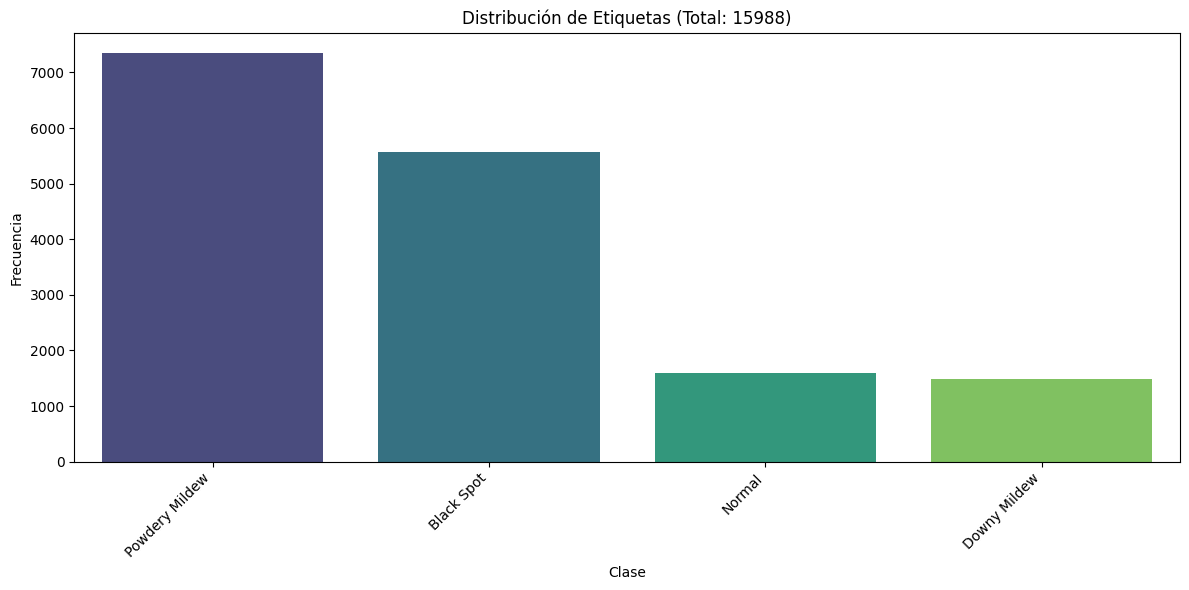


📸 Generando ejemplos visuales...


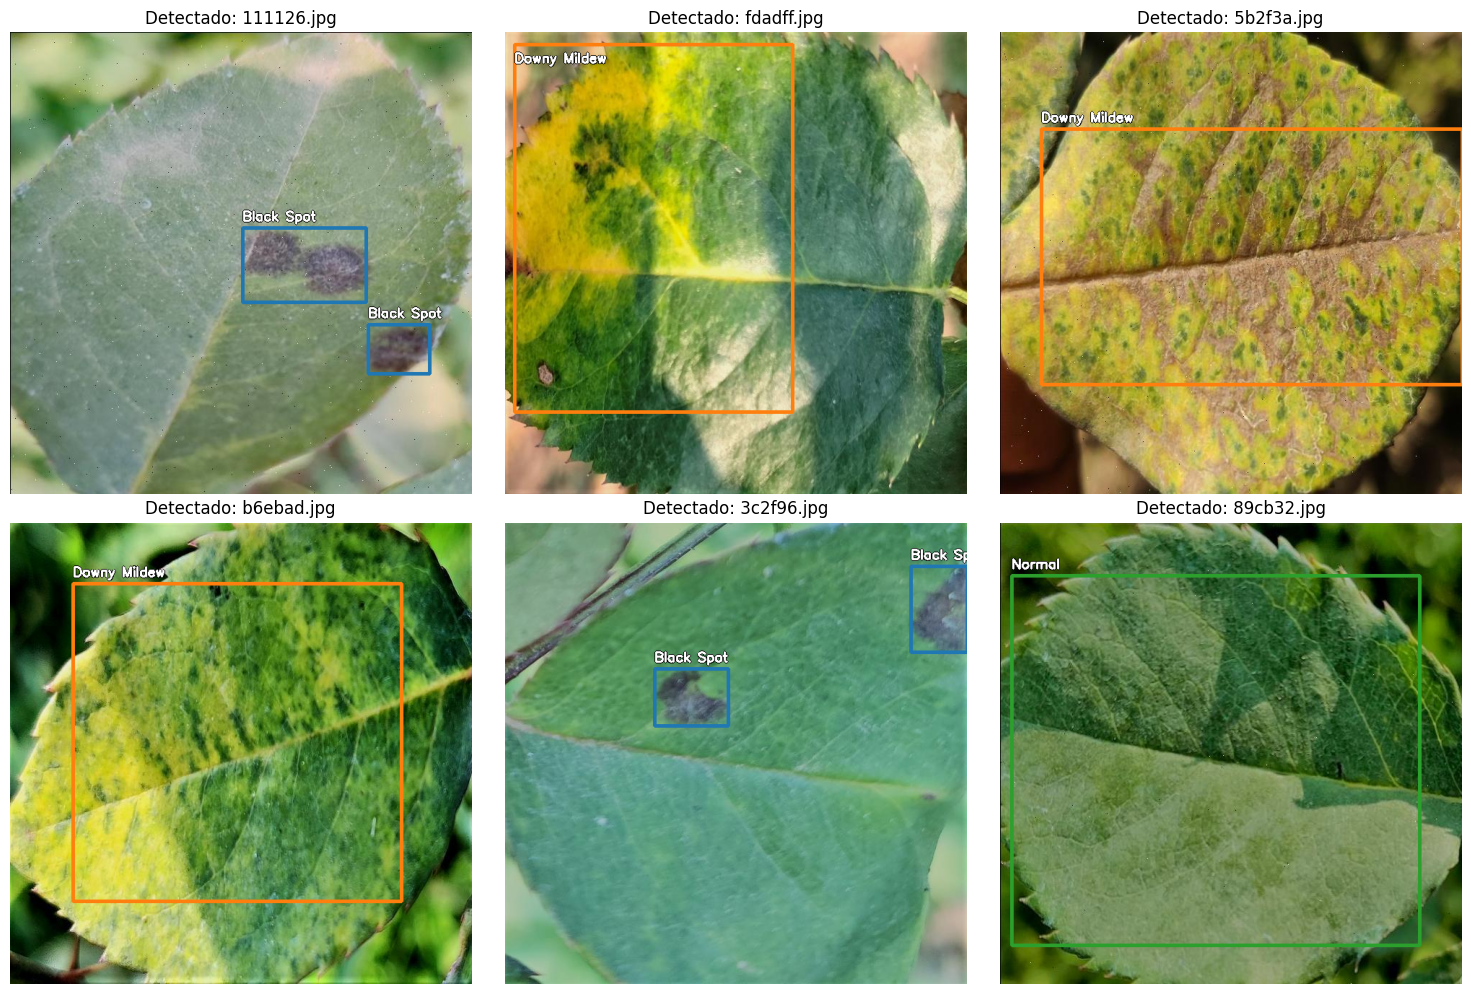

In [3]:
import os
import glob
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
import numpy as np
from collections import Counter

print("🤖 VcBot: Análisis Completo (Gráficas + Fotos Legibles)...")

# ==========================================
# 1. CARGAR CONFIGURACIÓN
# ==========================================
# Recuperar dataset_dir si se perdió
if 'dataset_dir' not in locals():
    import glob
    posibles = glob.glob("/content/tomatoes-*")
    if posibles: dataset_dir = sorted(posibles)[-1]
    else: dataset_dir = os.getcwd()

yaml_path = os.path.join(dataset_dir, "data.yaml")

class_names = []
if os.path.exists(yaml_path):
    with open(yaml_path, 'r') as f:
        data = yaml.safe_load(f)
        names = data.get('names', [])
        # Normalizar nombres
        if isinstance(names, dict):
            class_names = [names[i] for i in sorted(names.keys())]
        else:
            class_names = names
else:
    print("❌ No encuentro data.yaml")

print(f"📋 Clases detectadas: {class_names}")

# ==========================================
# 2. GRÁFICAS Y CONTEO (Histograma)
# ==========================================
print("\n📊 Generando estadísticas y gráficas...")

label_files = glob.glob(f'{dataset_dir}/**/labels/*.txt', recursive=True)
class_counts = Counter()

for lfile in label_files:
    with open(lfile, 'r') as f:
        lines = f.readlines()
        for line in lines:
            parts = line.strip().split()
            if len(parts) >= 5:
                try:
                    cls_id = int(parts[0])
                    if 0 <= cls_id < len(class_names):
                        class_counts[class_names[cls_id]] += 1
                except ValueError: pass

# --- AQUÍ ESTÁ EL GRÁFICO QUE PEDISTE ---
if class_counts:
    # 1. Tabla de texto
    print(f"\n{'CLASE':<30} | {'CANTIDAD':<10}")
    print("-" * 45)
    sorted_items = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
    for cls, count in sorted_items:
        print(f"{cls:<30} | {count:<10}")

    # 2. Gráfico de Barras (Seaborn)
    keys = [k for k, v in sorted_items]
    vals = [v for k, v in sorted_items]

    plt.figure(figsize=(12, 6))
    sns.barplot(x=keys, y=vals, hue=keys, legend=False, palette="viridis")
    plt.title(f"Distribución de Etiquetas (Total: {sum(vals)})")
    plt.xlabel("Clase")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No se encontraron etiquetas para graficar.")

# ==========================================
# 3. VISUALIZACIÓN DE FOTOS (Mejorada)
# ==========================================
print("\n📸 Generando ejemplos visuales...")

all_images = glob.glob(f'{dataset_dir}/**/images/*.jpg', recursive=True) + \
             glob.glob(f'{dataset_dir}/**/images/*.png', recursive=True)

if all_images:
    samples = random.sample(all_images, min(len(all_images), 6))
    plt.figure(figsize=(15, 10))

    for i, img_path in enumerate(samples):
        img = cv2.imread(img_path)
        if img is None: continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w, _ = img.shape

        # Buscar Label
        label_path = img_path.replace('/images/', '/labels/').rsplit('.', 1)[0] + ".txt"
        if not os.path.exists(label_path):
             label_path = os.path.join(os.path.dirname(os.path.dirname(img_path)), 'labels', os.path.basename(img_path).rsplit('.', 1)[0] + ".txt")

        box_drawn = False
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) >= 5:
                        try:
                            cls_id = int(parts[0])
                            # FIX: parts[1:5] para evitar error de unpack
                            cx, cy, bw, bh = map(float, parts[1:5])

                            x1 = int((cx - bw/2) * w)
                            y1 = int((cy - bh/2) * h)
                            x2 = int((cx + bw/2) * w)
                            y2 = int((cy + bh/2) * h)

                            color = plt.cm.tab10(cls_id % 10)
                            color_rgb = (int(color[0]*255), int(color[1]*255), int(color[2]*255))

                            # Dibujar caja
                            cv2.rectangle(img, (x1, y1), (x2, y2), color_rgb, 3)
                            box_drawn = True

                            # Texto inteligente
                            label_txt = class_names[cls_id] if cls_id < len(class_names) else str(cls_id)

                            # Si está muy arriba, escribir abajo
                            text_y = y1 - 10 if y1 > 25 else y1 + 25

                            # Borde Negro + Texto Blanco
                            cv2.putText(img, label_txt, (x1, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 4)
                            cv2.putText(img, label_txt, (x1, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)

                        except ValueError: pass

        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.axis('off')

        # Título dinámico
        if box_drawn:
            plt.title(f"Detectado: {os.path.basename(img_path)[-10:]}")
        else:
            plt.title(f"Sana/Fondo: {os.path.basename(img_path)[-10:]}", color='green')

    plt.tight_layout()
    plt.show()
else:
    print("❌ No encontré imágenes.")

In [5]:
# 0. ACTUALIZAR LIBRERÍA (Necesario para YOLO11)
!pip install ultralytics -U

import gc
import torch
import os
import shutil
import yaml
from ultralytics import YOLO
from google.colab import drive

# ==============================================================================
# 1. PREPARACIÓN Y CONFIGURACIÓN
# ==============================================================================
print("🤖 VcBot: Iniciando configuración para YOLO11-Medium...")

# A. Montar Drive (CON FUERZA BRUTA PARA EVITAR ERRORES)
# force_remount=True ayuda a arreglar el error que te acaba de salir
if os.path.exists('/content/drive'):
    drive.mount('/content/drive', force_remount=True)
else:
    drive.mount('/content/drive')

# B. Definir ruta de salida en Drive
DRIVE_OUTPUT = "/content/drive/MyDrive/Torneo_Roboflow_Rosas"
os.makedirs(DRIVE_OUTPUT, exist_ok=True)

# Aseguramos que dataset_dir esté definido
if 'dataset_dir' not in locals():
    # Intento de recuperación automática
    if os.path.exists("/content/dataset_repartido"):
        dataset_dir = "/content/dataset_repartido"
        print(f"✅ Dataset recuperado en: {dataset_dir}")
    else:
        print("❌ ERROR: No encuentro el dataset. ¿Reiniciaste el entorno?")
        print("   👉 SI REINICIASTE: Debes volver a ejecutar el bloque de 'Redistribución 70/10/20' antes de este.")

# D. Arreglar data.yaml
if 'dataset_dir' in locals() and os.path.exists(dataset_dir):
    yaml_path = f"{dataset_dir}/data.yaml"

    if os.path.exists(yaml_path):
        with open(yaml_path, 'r') as f:
            data = yaml.safe_load(f)

        data['path'] = os.path.abspath(dataset_dir)
        data['train'] = "train/images"
        data['val'] = "valid/images"
        data['test'] = "test/images"

        with open(yaml_path, 'w') as f:
            yaml.dump(data, f)
        print("🔧 data.yaml arreglado correctamente.")
    else:
        print("⚠️ ADVERTENCIA: No se encontró data.yaml.")

# ==============================================================================
# 2. ENTRENAMIENTO (YOLO11 MEDIUM)
# ==============================================================================
if 'dataset_dir' in locals() and os.path.exists(dataset_dir):
    # Limpieza de memoria
    gc.collect()
    torch.cuda.empty_cache()

    print("🚀 VcBot: Desplegando YOLO11-MEDIUM...")

    model = YOLO('yolo11m.pt')

    PROYECTO_LOCAL = 'entrenamiento_yolo11'
    NOMBRE_EJECUCION = 'yolo11m_detect'

    try:
        model.train(
            data=f"{dataset_dir}/data.yaml",
            epochs=25,
            imgsz=640,
            batch=16,                  # Si falla, cambia a 8
            device=0 if torch.cuda.is_available() else 'cpu',
            project=PROYECTO_LOCAL,
            name=NOMBRE_EJECUCION,
            patience=10,
            plots=True
        )
        print("✅ Entrenamiento finalizado correctamente.")

        # ==============================================================================
        # 3. GUARDAR RESULTADOS EN DRIVE
        # ==============================================================================
        print("\n📦 Empaquetando y guardando resultados en Drive...")

        origen_resultados = f"/content/{PROYECTO_LOCAL}/{NOMBRE_EJECUCION}"
        destino_resultados = f"{DRIVE_OUTPUT}/{NOMBRE_EJECUCION}_Resultados"

        if os.path.exists(destino_resultados):
            shutil.rmtree(destino_resultados)

        shutil.copytree(
            origen_resultados,
            destino_resultados,
            ignore=shutil.ignore_patterns('weights', '*.pt')
        )

        print(f"🎉 ¡ÉXITO! Resultados guardados en: {destino_resultados}")

    except Exception as e:
        print(f"❌ Error durante el entrenamiento: {e}")
else:
    print("⛔ DETENIDO: No puedo entrenar porque no encuentro el dataset (variable dataset_dir perdida al reiniciar).")

🤖 VcBot: Iniciando configuración para YOLO11-Medium...
Mounted at /content/drive
🔧 data.yaml arreglado correctamente.
🚀 VcBot: Desplegando YOLO11-MEDIUM...
Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/rose-leaf-diseases-14/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.

## DATASET patata

https://app.roboflow.com/germanrv/potatoes_leaf-diseases/browse?queryText=&pageSize=50&startingIndex=0&browseQuery=true

In [6]:
import os
import glob
import yaml
from google.colab import drive

print("🤖 VcBot: Configurando dataset existente en Drive...")

# ==========================================
# 1. MONTAR DRIVE Y DEFINIR RUTA
# ==========================================
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# Tu ruta específica en Drive
dataset_dir = "/content/drive/MyDrive/Potatoes_leaf diseases.v1-v1_aug.yolov8"

# Verificación de seguridad
if not os.path.exists(dataset_dir):
    print(f"\n❌ ERROR CRÍTICO: No encuentro la carpeta en:\n   {dataset_dir}")
    print("   👉 Verifica que el nombre sea exacto (espacios, mayúsculas) y que Drive esté montado.")
else:
    print(f"\n✅ Dataset localizado en: {dataset_dir}")

    # ==========================================
    # 2. REPORTE DE ESTRUCTURA Y CONTEO
    # ==========================================
    print(f"\n📊 REPORTE DE ESTRUCTURA")
    print("-" * 50)

    carpetas = ['train', 'valid', 'test']
    total_imgs = 0

    for carpeta in carpetas:
        ruta_split = os.path.join(dataset_dir, carpeta)
        ruta_imgs = os.path.join(ruta_split, 'images')

        # Si no existe la subcarpeta 'images', miramos en la raíz del split
        if not os.path.exists(ruta_imgs):
            ruta_imgs = ruta_split

        if os.path.exists(ruta_imgs) and os.path.isdir(ruta_imgs):
            imgs = glob.glob(os.path.join(ruta_imgs, '*.jpg')) + \
                   glob.glob(os.path.join(ruta_imgs, '*.jpeg')) + \
                   glob.glob(os.path.join(ruta_imgs, '*.png'))

            n = len(imgs)
            total_imgs += n
            print(f"📁 {carpeta.upper()}:")
            print(f"   └── {n} imágenes encontradas.")
        else:
            if carpeta != 'test':
                print(f"⚠️ {carpeta.upper()}: No encontrada o vacía en {ruta_split}")

    print("-" * 50)
    print(f"∑ TOTAL: {total_imgs} imágenes.")

    # ==========================================
    # 3. ARREGLAR DATA.YAML (CRÍTICO)
    # ==========================================
    print("\n🔧 ACTUALIZANDO data.yaml...")

    yaml_path = os.path.join(dataset_dir, "data.yaml")

    if os.path.exists(yaml_path):
        try:
            with open(yaml_path, 'r') as f:
                data = yaml.safe_load(f)

            # 1. Ruta absoluta (Apunta a Drive)
            data['path'] = dataset_dir

            # 2. Rutas relativas
            data['train'] = "train/images"

            # 3. Detectar si la carpeta se llama 'valid' o 'val'
            if os.path.exists(os.path.join(dataset_dir, "valid")):
                data['val'] = "valid/images"
            else:
                data['val'] = "val/images" # Lo estándar en YOLO

            data['test'] = "test/images"

            # Guardar cambios
            with open(yaml_path, 'w') as f:
                yaml.dump(data, f, default_flow_style=False)

            print(f"   ✅ Archivo corregido correctamente.")

            if 'names' in data:
                print(f"   📋 Clases: {data['names']}")

        except Exception as e:
            print(f"   ❌ Error editando yaml: {e}")
    else:
        print("   ❌ No se encontró 'data.yaml' en la carpeta.")

    print(f"\n🚀 LISTO. Usa: data='{dataset_dir}/data.yaml'")

🤖 VcBot: Configurando dataset existente en Drive...

✅ Dataset localizado en: /content/drive/MyDrive/Potatoes_leaf diseases.v1-v1_aug.yolov8

📊 REPORTE DE ESTRUCTURA
--------------------------------------------------
📁 TRAIN:
   └── 1839 imágenes encontradas.
📁 VALID:
   └── 101 imágenes encontradas.
📁 TEST:
   └── 98 imágenes encontradas.
--------------------------------------------------
∑ TOTAL: 2038 imágenes.

🔧 ACTUALIZANDO data.yaml...
   ✅ Archivo corregido correctamente.
   📋 Clases: ['early bright', 'healthy', 'late bright']

🚀 LISTO. Usa: data='/content/drive/MyDrive/Potatoes_leaf diseases.v1-v1_aug.yolov8/data.yaml'


In [7]:
import os
import glob
import shutil
import yaml
import random
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

print("🤖 VcBot: Redistribuyendo dataset (70% Train | 10% Val | 20% Test)...")

# ==========================================
# 1. CONFIGURACIÓN
# ==========================================
# Ruta origen (Tu Drive)
SOURCE_DIR = "/content/drive/MyDrive/Potatoes_leaf diseases.v1-v1_aug.yolov8"

# Ruta destino (Local en Colab - Mucho más rápido para entrenar)
DEST_DIR = "/content/dataset_repartido"

# Borramos destino si existía para evitar mezclas
if os.path.exists(DEST_DIR):
    shutil.rmtree(DEST_DIR)

# Estructura de carpetas destino
for split in ['train', 'valid', 'test']:
    os.makedirs(f"{DEST_DIR}/{split}/images", exist_ok=True)
    os.makedirs(f"{DEST_DIR}/{split}/labels", exist_ok=True)

# ==========================================
# 2. RECOLECTAR TODO EL MATERIAL
# ==========================================
print("📦 Recolectando todas las imágenes y etiquetas del Drive...")

all_pairs = [] # Lista de tuplas (ruta_imagen, ruta_label)

# Buscamos en las carpetas originales (train, valid, test)
for folder in ['train', 'valid', 'test', 'val']: # 'val' por si acaso
    img_path_pattern = os.path.join(SOURCE_DIR, folder, 'images', '*.*')
    images = glob.glob(img_path_pattern)

    for img_file in images:
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            # Deducir ruta del label
            # Asumimos estructura standard: .../images/foto.jpg -> .../labels/foto.txt
            lbl_file = img_file.replace('/images/', '/labels/').rsplit('.', 1)[0] + ".txt"

            if os.path.exists(lbl_file):
                all_pairs.append((img_file, lbl_file))

total_files = len(all_pairs)
print(f"✅ Total de pares imagen-etiqueta encontrados: {total_files}")

if total_files == 0:
    print("❌ ERROR: No se encontraron pares. Verifica la ruta en Drive.")
else:
    # ==========================================
    # 3. DIVISIÓN MATEMÁTICA (70 / 10 / 20)
    # ==========================================
    # Primero separamos Train (70%) del resto (30%)
    train_pairs, temp_pairs = train_test_split(all_pairs, train_size=0.70, random_state=42, shuffle=True)

    # Del resto (30%), queremos que 10% del total sea Valid y 20% Test.
    # Matemáticamente: Valid es 1/3 del resto, Test es 2/3 del resto.
    val_pairs, test_pairs = train_test_split(temp_pairs, test_size=0.6666, random_state=42, shuffle=True)

    print(f"\n📊 NUEVA DISTRIBUCIÓN:")
    print(f"   Train (70%): {len(train_pairs)} imágenes")
    print(f"   Valid (10%): {len(val_pairs)} imágenes")
    print(f"   Test  (20%): {len(test_pairs)} imágenes")

    # ==========================================
    # 4. COPIAR ARCHIVOS (LA MUDANZA)
    # ==========================================
    def mover_archivos(lista_pares, split_name):
        print(f"   🚀 Copiando {split_name}...")
        for img_src, lbl_src in tqdm(lista_pares, desc=split_name):
            # Nombres de archivo
            fname_img = os.path.basename(img_src)
            fname_lbl = os.path.basename(lbl_src)

            # Destinos
            shutil.copy(img_src, f"{DEST_DIR}/{split_name}/images/{fname_img}")
            shutil.copy(lbl_src, f"{DEST_DIR}/{split_name}/labels/{fname_lbl}")

    mover_archivos(train_pairs, 'train')
    mover_archivos(val_pairs, 'valid')
    mover_archivos(test_pairs, 'test')

    # ==========================================
    # 5. CREAR DATA.YAML NUEVO
    # ==========================================
    # Leemos las clases del yaml original para no perderlas
    orig_yaml = os.path.join(SOURCE_DIR, "data.yaml")
    class_names = ['class0', 'class1', 'class2'] # Default

    if os.path.exists(orig_yaml):
        with open(orig_yaml, 'r') as f:
            d = yaml.safe_load(f)
            if 'names' in d:
                class_names = d['names']

    # Creamos el nuevo yaml apuntando al dataset local
    new_yaml_content = {
        'path': os.path.abspath(DEST_DIR),
        'train': 'train/images',
        'val': 'valid/images',
        'test': 'test/images',
        'names': class_names,
        'nc': len(class_names)
    }

    with open(f"{DEST_DIR}/data.yaml", 'w') as f:
        yaml.dump(new_yaml_content, f)

    # Actualizamos la variable global para el torneo
    dataset_dir = DEST_DIR

    print("\n" + "="*50)
    print("🎉 ¡REDISTRIBUCIÓN COMPLETADA!")
    print(f"📂 Nuevo dataset listo en: {dataset_dir}")
    print("   (Ya puedes ejecutar el bloque del Torneo directamente)")

🤖 VcBot: Redistribuyendo dataset (70% Train | 10% Val | 20% Test)...
📦 Recolectando todas las imágenes y etiquetas del Drive...
✅ Total de pares imagen-etiqueta encontrados: 2038

📊 NUEVA DISTRIBUCIÓN:
   Train (70%): 1426 imágenes
   Valid (10%): 204 imágenes
   Test  (20%): 408 imágenes
   🚀 Copiando train...


train:   0%|          | 0/1426 [00:00<?, ?it/s]

   🚀 Copiando valid...


valid:   0%|          | 0/204 [00:00<?, ?it/s]

   🚀 Copiando test...


test:   0%|          | 0/408 [00:00<?, ?it/s]


🎉 ¡REDISTRIBUCIÓN COMPLETADA!
📂 Nuevo dataset listo en: /content/dataset_repartido
   (Ya puedes ejecutar el bloque del Torneo directamente)


🤖 VcBot: Analizando el dataset FINAL (Redistribuido)...
📂 Leyendo datos desde: /content/dataset_repartido
📋 Clases detectadas: ['early bright', 'healthy', 'late bright']

📊 Generando estadísticas...

CLASE                          | CANTIDAD  
---------------------------------------------
early bright                   | 18069     
late bright                    | 1379      
healthy                        | 364       


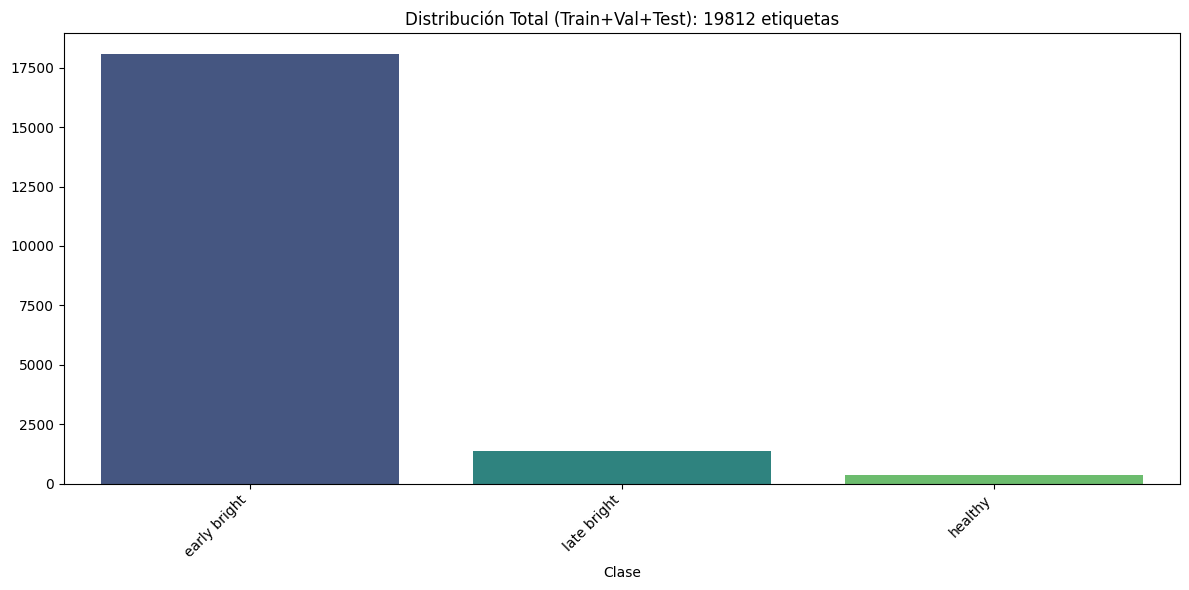


📸 Verificando integridad de imágenes y cajas...


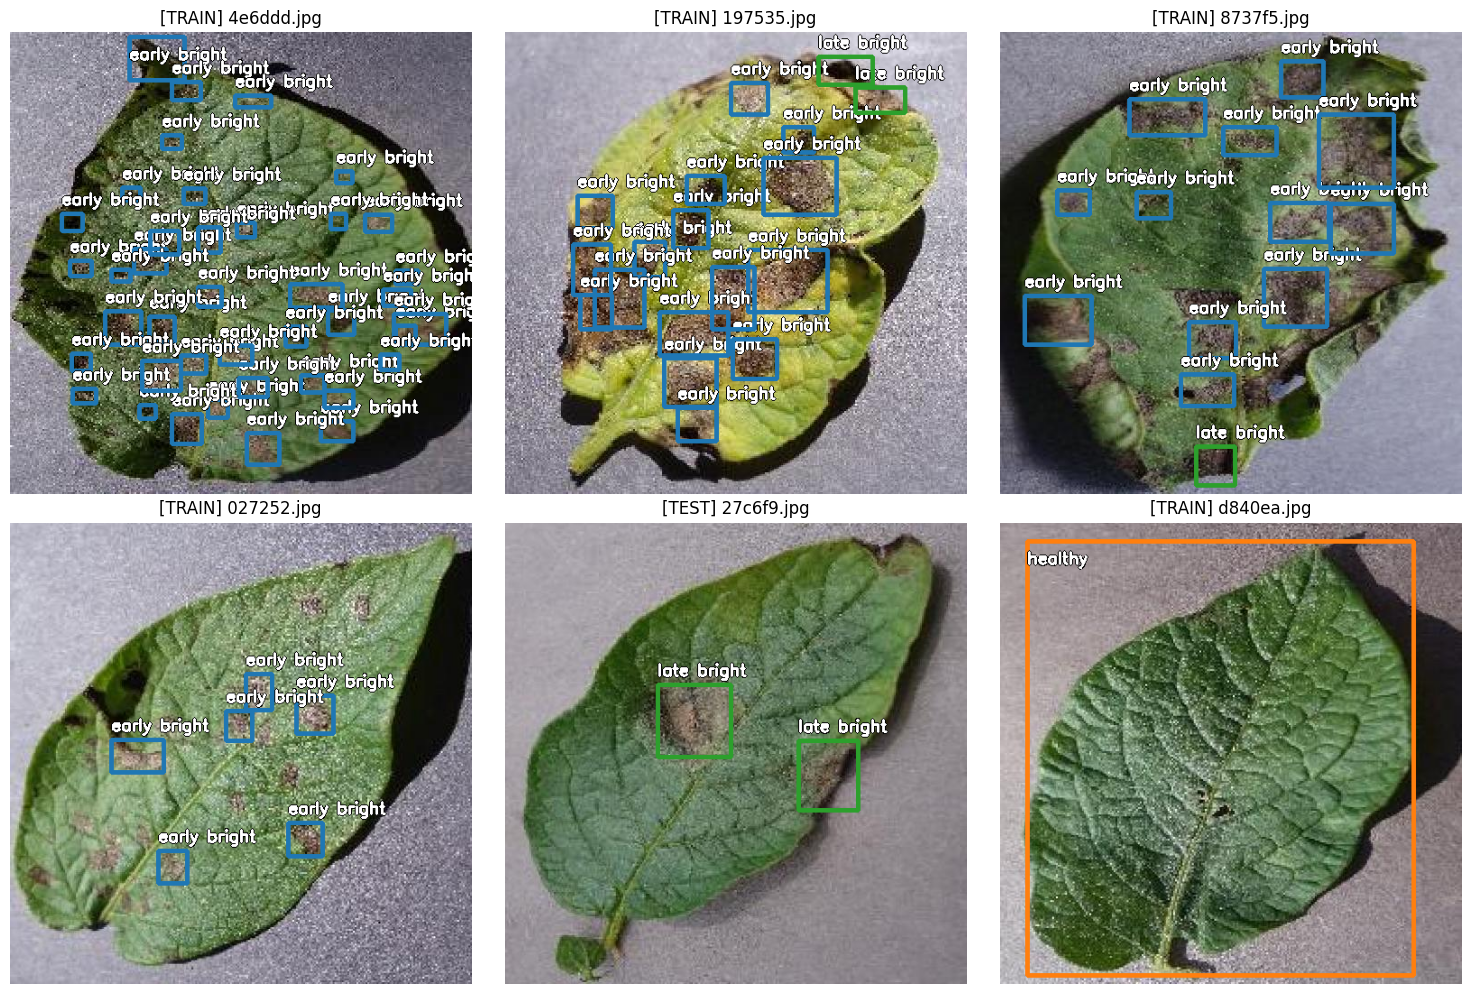

In [8]:
import os
import glob
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
import numpy as np
from collections import Counter

print("🤖 VcBot: Analizando el dataset FINAL (Redistribuido)...")

# ==========================================
# 1. FORZAR LA RUTA AL NUEVO DATASET
# ==========================================
# Apuntamos directamente a la carpeta que acabamos de crear
dataset_dir = "/content/dataset_repartido"

if not os.path.exists(dataset_dir):
    print(f"❌ ERROR: No encuentro {dataset_dir}")
    print("   ¿Ejecutaste el bloque anterior de redistribución?")
else:
    print(f"📂 Leyendo datos desde: {dataset_dir}")

    yaml_path = os.path.join(dataset_dir, "data.yaml")
    class_names = []

    if os.path.exists(yaml_path):
        with open(yaml_path, 'r') as f:
            data = yaml.safe_load(f)
            names = data.get('names', [])
            if isinstance(names, dict):
                class_names = [names[i] for i in sorted(names.keys())]
            else:
                class_names = names
    else:
        print("❌ No encuentro data.yaml en la nueva carpeta.")

    print(f"📋 Clases detectadas: {class_names}")

    # ==========================================
    # 2. GRÁFICAS Y CONTEO
    # ==========================================
    print("\n📊 Generando estadísticas...")

    # Buscamos en train, valid y test
    label_files = glob.glob(f'{dataset_dir}/**/labels/*.txt', recursive=True)
    class_counts = Counter()

    for lfile in label_files:
        with open(lfile, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) >= 5:
                    try:
                        cls_id = int(parts[0])
                        if 0 <= cls_id < len(class_names):
                            class_counts[class_names[cls_id]] += 1
                    except ValueError: pass

    if class_counts:
        # Tabla
        print(f"\n{'CLASE':<30} | {'CANTIDAD':<10}")
        print("-" * 45)
        sorted_items = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
        for cls, count in sorted_items:
            print(f"{cls:<30} | {count:<10}")

        # Gráfico
        keys = [k for k, v in sorted_items]
        vals = [v for k, v in sorted_items]

        plt.figure(figsize=(12, 6))
        sns.barplot(x=keys, y=vals, hue=keys, legend=False, palette="viridis")
        plt.title(f"Distribución Total (Train+Val+Test): {sum(vals)} etiquetas")
        plt.xlabel("Clase")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


    else:
        print("⚠️ No se encontraron etiquetas. Algo falló en la copia.")

    # ==========================================
    # 3. VISUALIZACIÓN DE FOTOS
    # ==========================================
    print("\n📸 Verificando integridad de imágenes y cajas...")

    all_images = glob.glob(f'{dataset_dir}/**/images/*.jpg', recursive=True) + \
                 glob.glob(f'{dataset_dir}/**/images/*.png', recursive=True)

    if all_images:
        samples = random.sample(all_images, min(len(all_images), 6))
        plt.figure(figsize=(15, 10))

        for i, img_path in enumerate(samples):
            img = cv2.imread(img_path)
            if img is None: continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            h, w, _ = img.shape

            # Buscar Label (asumiendo estructura estricta YOLO)
            label_path = img_path.replace('/images/', '/labels/').rsplit('.', 1)[0] + ".txt"

            box_drawn = False
            if os.path.exists(label_path):
                with open(label_path, 'r') as f:
                    lines = f.readlines()
                    for line in lines:
                        parts = line.strip().split()
                        if len(parts) >= 5:
                            try:
                                cls_id = int(parts[0])
                                cx, cy, bw, bh = map(float, parts[1:5]) # Safe unpack

                                x1 = int((cx - bw/2) * w)
                                y1 = int((cy - bh/2) * h)
                                x2 = int((cx + bw/2) * w)
                                y2 = int((cy + bh/2) * h)

                                color = plt.cm.tab10(cls_id % 10)
                                color_rgb = (int(color[0]*255), int(color[1]*255), int(color[2]*255))

                                cv2.rectangle(img, (x1, y1), (x2, y2), color_rgb, 3)
                                box_drawn = True

                                label_txt = class_names[cls_id] if cls_id < len(class_names) else str(cls_id)
                                text_y = y1 - 10 if y1 > 25 else y1 + 25

                                # Texto legible
                                cv2.putText(img, label_txt, (x1, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 4)
                                cv2.putText(img, label_txt, (x1, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)

                            except ValueError: pass

            plt.subplot(2, 3, i+1)
            plt.imshow(img)
            plt.axis('off')

            # Saber de qué carpeta viene (train/valid/test)
            split_name = img_path.split('/')[-3] # .../train/images/foto.jpg
            if box_drawn:
                plt.title(f"[{split_name.upper()}] {os.path.basename(img_path)[-10:]}")
            else:
                plt.title(f"[{split_name.upper()}] Sana/Fondo", color='green')

        plt.tight_layout()
        plt.show()


    else:
        print("❌ No encontré imágenes en la nueva carpeta.")

In [10]:
import gc
import torch
import os
import shutil
import yaml
from ultralytics import YOLO
from google.colab import drive

# ==============================================================================
# 1. PREPARACIÓN Y CONFIGURACIÓN
# ==============================================================================
print("🤖 VcBot: Iniciando configuración...")

# A. Montar Drive
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# B. Definir ruta de salida en Drive (Para los resultados)
DRIVE_OUTPUT = "/content/drive/MyDrive/Torneo_Roboflow_Tomates_Healthy_AUG"
os.makedirs(DRIVE_OUTPUT, exist_ok=True)


# D. Arreglar data.yaml
yaml_path = f"{dataset_dir}/data.yaml"

if os.path.exists(yaml_path):
    with open(yaml_path, 'r') as f:
        data = yaml.safe_load(f)

    data['path'] = os.path.abspath(dataset_dir)
    data['train'] = "train/images"
    data['val'] = "valid/images"
    data['test'] = "test/images"

    with open(yaml_path, 'w') as f:
        yaml.dump(data, f)
    print("🔧 data.yaml arreglado correctamente.")
else:
    # Esto es solo por seguridad si no ejecutas el bloque de descarga antes
    print("⚠️ ADVERTENCIA: No se encontró data.yaml. Asegúrate de haber descargado el dataset.")

    # Verificamos el contenido del archivo data.yaml
print(f"🧐 Inspeccionando archivo en: {dataset_dir}/data.yaml")
print("-" * 40)

with open(f"{dataset_dir}/data.yaml", 'r') as f:
    print(f.read())

print("-" * 40)

# ==============================================================================
# 2. ENTRENAMIENTO
# ==============================================================================
# Limpieza de memoria
gc.collect()
torch.cuda.empty_cache()

print("🚀 VcBot: Desplegando YOLO11-MEDIUM...")

model = YOLO('yolo11m.pt')

PROYECTO_LOCAL = 'entrenamiento_yolo11-patata'
NOMBRE_EJECUCION = 'yolo11m_detect'

try:
    model.train(
        data=f"{dataset_dir}/data.yaml",
        epochs=50,
        imgsz=640,
        batch=16,
        device=0 if torch.cuda.is_available() else 'cpu',
        project=PROYECTO_LOCAL,    # Carpeta raíz local
        name=NOMBRE_EJECUCION,     # Subcarpeta local
        patience=10,
        plots=True                 # ¡Importante! Genera los gráficos
    )
    print("✅ Entrenamiento finalizado correctamente.")

    # ==============================================================================
    # 3. GUARDAR SOLO RESULTADOS (SIN MODELOS PESADOS)
    # ==============================================================================
    print("\n📦 Empaquetando y guardando resultados en Drive...")

    # Ruta donde YOLO guardó todo en Colab
    origen_resultados = f"/content/{PROYECTO_LOCAL}/{NOMBRE_EJECUCION}"

    # Ruta destino en Drive
    destino_resultados = f"{DRIVE_OUTPUT}/{NOMBRE_EJECUCION}_Resultados"

    # Si ya existe la carpeta en Drive, la borramos para actualizarla
    if os.path.exists(destino_resultados):
        shutil.rmtree(destino_resultados)

    # COPIAR TODO EXCEPTO LA CARPETA 'weights'
    # Esto copiará: results.csv, confusion_matrix.png, results.png, etc.
    shutil.copytree(
        origen_resultados,
        destino_resultados,
        ignore=shutil.ignore_patterns('weights', '*.pt') # <--- AQUÍ ESTÁ LA MAGIA
    )

    print(f"🎉 ¡ÉXITO! Resultados guardados en: {destino_resultados}")
    print("   (Se han excluido los archivos .pt para ahorrar espacio, solo tienes gráficas y tablas)")

except Exception as e:
    print(f"❌ Error: {e}")

🤖 VcBot: Iniciando configuración...
🔧 data.yaml arreglado correctamente.
🧐 Inspeccionando archivo en: /content/dataset_repartido/data.yaml
----------------------------------------
names:
- early bright
- healthy
- late bright
nc: 3
path: /content/dataset_repartido
test: test/images
train: train/images
val: valid/images

----------------------------------------
🚀 VcBot: Desplegando YOLO11-MEDIUM...
Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset_repartido/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, free